# Trying from scratch


In [1]:
# Base Data Science snippet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os
import time
from tqdm import tqdm_notebook
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline
%load_ext autoreload
%autoreload 2

pd.options.display.max_columns = 1000

# Creating the data

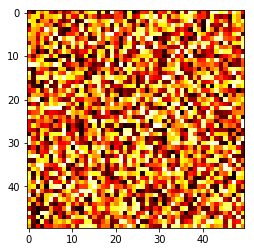

In [129]:
#area = [[1, 4, 5, 12], [5, 8, 9, 0], [6, 7, 11, 19], [6, 7, 11, 19]]
area = pd.DataFrame(np.random.random((50, 50)))
area
plt.imshow(area, cmap='hot_r', interpolation='nearest')
#hot_r is the reverse color of hot


In [130]:
#area_to_table transforme une area (heatmap de l'espace) en table de 3 colonnes : abscisse, ordonnée, valeur
# 
def area_to_table(mat):
    nb_l = mat.shape[0]
    nb_c = mat.shape[1]
    mat_pts = pd.DataFrame(np.zeros(shape=(nb_l*nb_l,3)))# crée un dataframe vide
    mat_pts = mat_pts.fillna(0) # with 0s rather than NaNs
    k=0
    for col in mat:
        indice_ligne=0
        for lig in mat[col]:
#           print(col,lig)
            mat_pts.loc[k+col,0] = indice_ligne
            mat_pts.loc[k+col,1] = col
            mat_pts.loc[k+col,2] = lig
            indice_ligne=indice_ligne+1
            k=k+1
    return mat_pts


In [131]:
area_pts=area_to_table(area)
area_pts.head()
print(area_pts)
print(area_pts.loc[0,1])

         0     1         2
0      0.0   0.0  0.775671
1      1.0   0.0  0.480085
2      2.0   0.0  0.190975
3      3.0   0.0  0.899460
4      4.0   0.0  0.636313
...    ...   ...       ...
2544  45.0  49.0  0.660473
2545  46.0  49.0  0.240982
2546  47.0  49.0  0.827984
2547  48.0  49.0  0.172361
2548  49.0  49.0  0.441758

[2549 rows x 3 columns]
0.0


In [87]:
liste_mag=pd.DataFrame.from_dict({'1': [30.1, 25.7, "Paris"], '2': [13, 10, "Vincennes"],
    '3': [33.3, 15.4, "Montreuil"], '4': [44, 7, "Boulogne"]}, orient = 'index')
liste_mag
liste_mag.columns = ['longitude', 'latitude','ville']

In [90]:
# Ajout de nouvelles lignes
liste_mag.loc[len(liste_mag)+1] = [6,32,"Nanterre"]
liste_mag.loc[len(liste_mag)+1] = [24,18,"Plaisir"]
liste_mag.loc[len(liste_mag)+1] = [19,24,"Garches"]
liste_mag.loc[len(liste_mag)+1] = [42,35,"Saint-Cloud"]
liste_mag.loc[len(liste_mag)+1] = [24,48,"Macon"]
liste_mag.loc[len(liste_mag)+1] = [13,34,"Palaiseau"]
liste_mag_init=liste_mag.copy()

In [124]:
def ajouter_magasin(magasins, abscisse, ordonnee, nom):# Ajout de nouvelles lignes
    magasins.loc[len(magasins)+1] = [abscisse,ordonnee,nom]
    return magasins

In [91]:
liste_mag_init

,longitude,latitude,ville
1,30.1,25.7,Paris
2,13.0,10.0,Vincennes
3,33.3,15.4,Montreuil
4,44.0,7.0,Boulogne
5,6.0,32.0,Nanterre
6,24.0,18.0,Plaisir
7,19.0,24.0,Garches
8,42.0,35.0,Saint-Cloud
9,24.0,48.0,Macon
10,13.0,34.0,Palaiseau


In [9]:
def labeling_plot(mon_x,mon_y,mon_lab):
    for label, i, j in zip(mon_lab, mon_x, mon_y):
        plt.annotate(
            label,
            xy=(i, j), xytext=(-20, 20),
            textcoords='offset points', ha='right', va='bottom',
            bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
            arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
#         Enlever l'argument arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0') pour avoir les fleches

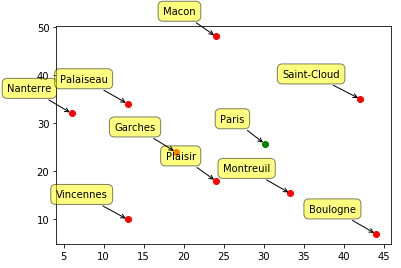

In [10]:
x=liste_mag.loc[:,"longitude"]
y=liste_mag.loc[:,"latitude"]
lab=liste_mag.loc[:,"ville"]
plt.scatter(x[lab =="Paris"], y[lab == "Paris"], color='g', label='Paris')
plt.scatter(x[lab != "Paris"], y[lab != "Paris"], color='r', label='Autres')
labeling_plot(x,y,lab)
plt.show()



# Knn - entrainement aux cartes et prédictions

In [11]:
#valeurs
longueur=25
largeur=45
k=1
#fin valeurs

x=liste_mag.loc[:,"longitude"]
y=liste_mag.loc[:,"latitude"]
lab=liste_mag.loc[:,"ville"]

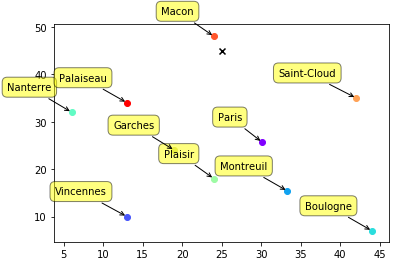

In [13]:
#graphique
# plt.scatter(x, y, label=lab)

colors = iter(cm.rainbow(np.linspace(0, 1, 10)))
for m in range(len(x)):
    plt.scatter(x[[m]], y[[m]], color=next(colors))
#     plt.text(x[[m]],y[[m]],lab[[m]], fontsize=9)
plt.scatter(longueur, largeur, marker='x',color='k')
labeling_plot(x,y,lab)
plt.show()
# plt.legend()
#fin graphique


In [14]:
#algo knn
d=list(zip(x,y))
model = KNeighborsClassifier(n_neighbors=k)
model.fit(d,lab)
prediction= model.predict([[longueur,largeur]])
#fin algo knn

In [15]:
print(prediction)

['Macon']


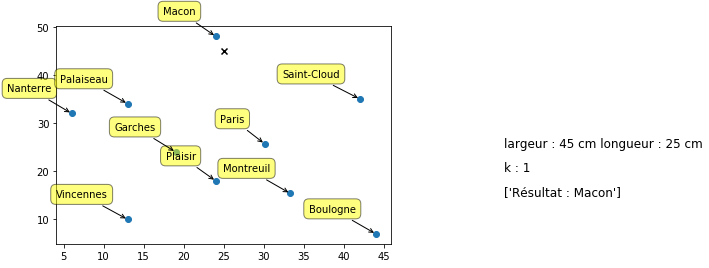

In [16]:
#graphique
plt.scatter(x, y, label=lab)
plt.scatter(longueur, largeur, marker = 'x', color='k')
# plt.legend()
#fin graphique

#Affichage résultats
txt="Résultat : "
txt = txt+prediction

plt.text(50 + 10,25, f"largeur : {largeur} cm longueur : {longueur} cm", fontsize=12)
plt.text(50 + 10,25-5, f"k : {k}", fontsize=12)
plt.text(50 + 10,25-10, txt, fontsize=12)
labeling_plot(x,y,lab)

#fin affichage résultats

plt.show()

# KNN def

In [ ]:
carte = pd.DataFrame(np.ones([50, 50]))

In [18]:
def predict_area(mat,mod):
    cible=area_to_table(mat)
    nb_l = mat.shape[0]
    nb_c = mat.shape[1]
    mat_pts = pd.DataFrame(np.zeros(shape=(nb_l*nb_l,4)))# crée un dataframe vide
    mat_pts = mat_pts.fillna(0) # with 0s rather than NaNs
    k=0
    color=0
#     print(color)
#     mat_pts.loc[0,0] = color
#     print('ok')
#     print(mat_pts.loc[0,0])
    for col in mat:
        indice_ligne=0
        for lig in mat[col]:
#           partie prédiction   
    
            if col!=0 or k!=0 :
                last_pred=pred
            else :
                last_pred='first pred'
            pred= mod.predict([[indice_ligne,col]])
#           Fin de la pred

#           association d'une couleur
            if pred==last_pred :
                color=color+1
            else :
                color = color
#           Fin couleur
#             print(color)
            mat_pts.loc[k+col,0] = indice_ligne
            mat_pts.loc[k+col,1] = col
            mat_pts.loc[k+col,2] = lig
            mat_pts.loc[k+col,3] = pred
            indice_ligne=indice_ligne+1
            k=k+1
    return mat_pts

In [132]:
res=predict_area(area,model)
res.columns=["abscisse","ordonnee","valeur","ville"]

In [133]:
res

,abscisse,ordonnee,valeur,ville
0,0.0,0.0,0.775671,Vincennes
1,1.0,0.0,0.480085,Vincennes
2,2.0,0.0,0.190975,Vincennes
3,3.0,0.0,0.899460,Vincennes
4,4.0,0.0,0.636313,Vincennes
5,5.0,0.0,0.287545,Vincennes
6,6.0,0.0,0.400386,Vincennes
7,7.0,0.0,0.757269,Vincennes
8,8.0,0.0,0.221948,Vincennes
9,9.0,0.0,0.120703,Vincennes


In [20]:
couleurs=pd.DataFrame(lab.unique())
couleurs[1]=range(len(couleurs))
couleurs.columns=["ville","code"]

In [21]:
res=pd.merge(left=res,right=couleurs,on="ville",how="left")
res=pd.merge(left=res,right=liste_mag,on="ville",how="left")

In [22]:
res["distance"]=(res["abscisse"]-res["longitude"])**2+(res["ordonnee"]-res["latitude"])**2

In [23]:
x=res["abscisse"]
y=res["ordonnee"]
lab=res["ville"]
mescolor=res["code"]

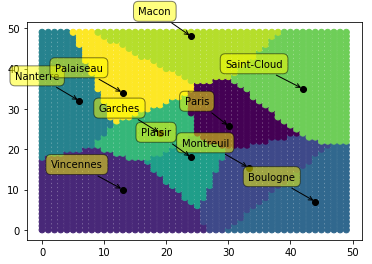

In [24]:
x_magasin=liste_mag.loc[:,"longitude"]
y_magasin=liste_mag.loc[:,"latitude"]
lab_magasin=liste_mag.loc[:,"ville"]

plt.scatter(x, y, c=mescolor)
plt.scatter(x_magasin, y_magasin, c='k',label=lab_magasin)

#fin graphique
labeling_plot(x_magasin,y_magasin,lab_magasin)


In [44]:
grouped = res.drop(['abscisse','distance'],1).groupby('ville')
# for name, group in grouped:
#     print(name)
#     print(group)

In [64]:
score_1=pd.DataFrame(grouped.size())
score_1.columns = ['score']

In [164]:
res.head()
res.drop(columns = ['abscisse','ordonnee'])

,valeur,ville
0,0.775671,Vincennes
1,0.480085,Vincennes
2,0.190975,Vincennes
3,0.899460,Vincennes
4,0.636313,Vincennes
5,0.287545,Vincennes
6,0.400386,Vincennes
7,0.757269,Vincennes
8,0.221948,Vincennes
9,0.120703,Vincennes


In [174]:
def scoring_magasins(magasins,ma_carte,mon_model):
        
    x=magasins.loc[:,"longitude"]
    y=magasins.loc[:,"latitude"]
    lab=magasins.loc[:,"ville"]
    d=list(zip(x,y))
    
#     on fit le modèle et on prédit a carte
    mon_model.fit(d,lab)
    res=predict_area(ma_carte,mon_model)
    
#     On renomme les comonnes et on prépare les couleurs du plot
    res.columns=["abscisse","ordonnee","valeur","ville"]
    couleurs=pd.DataFrame(lab.unique())
    couleurs[1]=range(len(couleurs))
    couleurs.columns=["ville","code"]
    
# On agrège les infos de couleurs, les infos correspondants aux magasins prédits, les infos de distance
    res=pd.merge(left=res,right=couleurs,on="ville",how="left")
    res=pd.merge(left=res,right=liste_mag,on="ville",how="left")
    res["distance"]=(res["abscisse"]-res["longitude"])**2+(res["ordonnee"]-res["latitude"])**2
    x=res["abscisse"]
    y=res["ordonnee"]
    lab=res["ville"]
    mescolor=res["code"]
    x_magasin=magasins.loc[:,"longitude"]
    y_magasin=magasins.loc[:,"latitude"]
    lab_magasin=magasins.loc[:,"ville"]

    plt.scatter(x, y, c=mescolor)
    plt.scatter(x_magasin, y_magasin, c='k',label=lab_magasin)
    
    #fin graphique
    labeling_plot(x_magasin,y_magasin,lab_magasin)
    
    grouped = res.drop(columns=['abscisse','ordonnee','code','longitude','latitude','distance']).groupby('ville').sum()
#     score=pd.DataFrame(grouped.size())
#     score.columns = ['score']
    return grouped

In [126]:
def compare_score(df1,df2) :
    comp_score=df1.merge(df2,how="outer",left_index=True, right_index=True)
    comp_score=comp_score.fillna(0)
    comp_score.columns=['avant','apres']
    comp_score['gain']=comp_score['apres']-comp_score['avant']
    return comp_score

# Mise en application

In [125]:
knn=KNeighborsClassifier(n_neighbors=1)

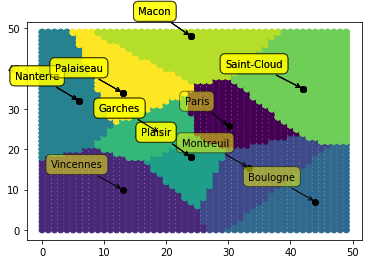

In [176]:
score1=scoring_magasins(liste_mag_init,area,knn)

In [177]:
score1

,valeur
ville,
0.0,0.000000
Boulogne,126.779419
Garches,232.184545
Macon,351.361146
Montreuil,123.900975
Nanterre,397.167667
Palaiseau,324.764767
Paris,93.336337
Plaisir,203.731596


In [179]:
liste_mag=ajouter_magasin(liste_mag,10,12,'magasintest')

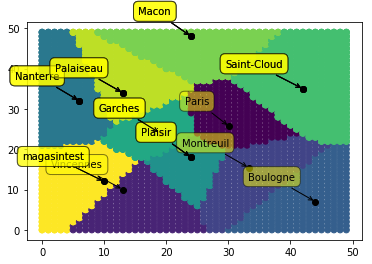

In [183]:
score2=scoring_magasins(liste_mag,area,knn)

In [184]:
score2

,valeur
ville,
0.0,0.000000
Boulogne,126.779419
Garches,219.906424
Macon,351.361146
Montreuil,123.900975
Nanterre,368.463845
Palaiseau,324.764767
Paris,93.336337
Plaisir,203.731596


In [185]:
compare_score(score1,score2)

,avant,apres,gain
ville,,,
0.0,0.000000,0.000000,0.000000
Boulogne,126.779419,126.779419,0.000000
Garches,232.184545,219.906424,-12.278122
Macon,351.361146,351.361146,0.000000
Montreuil,123.900975,123.900975,0.000000
Nanterre,397.167667,368.463845,-28.703823
Palaiseau,324.764767,324.764767,0.000000
Paris,93.336337,93.336337,0.000000
Plaisir,203.731596,203.731596,0.000000
